<a href="https://colab.research.google.com/github/byeonguklee/Python/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1_%ED%9A%8C%EA%B7%80_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 보스턴 주택 가격 데이터셋

from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
mean = train_data.mean(axis=0)

In [6]:
train_data -= mean 
#train_data = train_data - mean과 같은 표현

In [7]:
# 표준 편차를 구한다.
std = train_data.std(axis=0)

In [8]:
# standard Scaling

train_data /= std
#train_data = train_data / std 과 같은 표현

In [9]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [10]:
mean = test_data.mean(axis=0)
test_data -= mean
std = test_data.std(axis=0)
test_data /= std

In [11]:
test_data

array([[ 2.8040301 , -0.50784934,  0.96960877, ...,  0.90513041,
        -4.27829517,  2.51324773],
       [-0.55530596, -0.50784934, -0.17801704, ..., -0.28485844,
         0.3909446 ,  0.58604286],
       [-0.56808398, -0.50784934, -0.86176938, ...,  0.90513041,
         0.41570668, -0.38506427],
       ...,
       [-0.23539182, -0.50784934,  1.17955762, ..., -1.82192738,
         0.32313459, -1.55879807],
       [-0.5113909 , -0.50784934, -0.71849348, ..., -0.48318992,
         0.34967446, -0.38956708],
       [-0.03148414, -0.50784934,  1.17955762, ..., -1.82192738,
        -1.57465677, -0.3745577 ]])

In [12]:
# 신경망을 만든다.
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer='rmsprop', loss = 'mse', metrics=['mae'])

  return model

In [13]:
# K-folder 검증

k = 4

num_val_samples = len(train_data) // k  # 폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리 중인 폴더 #', i)

  # 검증 데이터를 준비: k번째 분할
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples] # 슬라이싱
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]

  # 훈련 데이터의 준비:
  partial_train_data = np.concatenate(
      [train_data[ : i * num_val_samples],
      train_data[(i+1) * num_val_samples :]], axis=0)
  partial_train_labels = np.concatenate(
      [train_labels[ : i * num_val_samples],
      train_labels[(i+1) * num_val_samples :]], axis=0)
  
  model = build_model()
  model.fit(partial_train_data, partial_train_labels, epochs=20, batch_size=1, verbose=0)

  val_mse, val_mae = model.evaluate(val_data, val_labels)
  all_scores.append(val_mae)

처리 중인 폴더 # 0
4/4 [==============================] - 0s 5ms/step - loss: 11.0662 - mae: 2.3982
처리 중인 폴더 # 1
4/4 [==============================] - 0s 4ms/step - loss: 10.5294 - mae: 2.5393
처리 중인 폴더 # 2
4/4 [==============================] - 0s 4ms/step - loss: 14.1730 - mae: 2.5027
처리 중인 폴더 # 3
4/4 [==============================] - 0s 4ms/step - loss: 14.5742 - mae: 2.5503


In [14]:
all_scores

[2.3981661796569824, 2.5392963886260986, 2.502675771713257, 2.550255537033081]

In [15]:
np.mean(all_scores)

2.4975984692573547

In [16]:
# K-folder 검증

k = 4
num_epochs = 500

num_val_samples = len(train_data) // k  # 폴더의 사이즈
all_scores = []

for i in range(k):
  print('처리 중인 폴더 #', i)

  # 검증 데이터를 준비: k번째 분할
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples] # 슬라이싱
  val_labels = train_labels[i * num_val_samples : (i+1) * num_val_samples]

  # 훈련 데이터의 준비:
  partial_train_data = np.concatenate(
      [train_data[ : i * num_val_samples],
      train_data[(i+1) * num_val_samples :]], axis=0)
  partial_train_labels = np.concatenate(
      [train_labels[ : i * num_val_samples],
      train_labels[(i+1) * num_val_samples :]], axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_labels, 
              epochs=num_epochs, 
              batch_size=1, 
              validation_data=(val_data, val_labels),
              verbose=0)
  mae_history = history.history['mae']

  all_scores.append(mae_history)

처리 중인 폴더 # 0
처리 중인 폴더 # 1
처리 중인 폴더 # 2
처리 중인 폴더 # 3


In [17]:
average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]

Text(0, 0.5, 'Validation MAE')

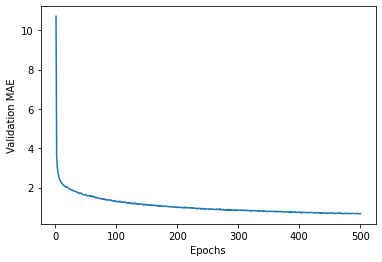

In [18]:
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')